# 데이터셋 경로 지정

In [1]:
import os

# 기본 경로
base_dir = './Datasets/4. 고양이와 개 이미지 분류하기'

train_dir = base_dir+'/train'
validation_dir = base_dir+'/validation'

# 훈련에 사용되는 고양이/개 이미지 경로
train_cats_dir = train_dir+'/cats'
train_dogs_dir = train_dir+'/dogs'
print(train_cats_dir)
print(train_dogs_dir)

# 테스트에 사용되는 고양이/개 이미지 경로
validation_cats_dir = validation_dir+'/cats'
validation_dogs_dir = validation_dir+'/dogs'
print(validation_cats_dir)
print(validation_dogs_dir)

./Datasets/4. 고양이와 개 이미지 분류하기/train/cats
./Datasets/4. 고양이와 개 이미지 분류하기/train/dogs
./Datasets/4. 고양이와 개 이미지 분류하기/validation/cats
./Datasets/4. 고양이와 개 이미지 분류하기/validation/dogs


In [2]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:5])
print(train_dog_fnames[:5])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg']


In [3]:
print('Total training cat images :', len(os.listdir(train_cats_dir)))
print('Total training dog images :', len(os.listdir(train_dogs_dir)))
print('Total validation cat images :', len(os.listdir(validation_cats_dir)))
print('Total validation dog images :', len(os.listdir(validation_dogs_dir)))

Total training cat images : 1000
Total training dog images : 1000
Total validation cat images : 500
Total validation dog images : 500


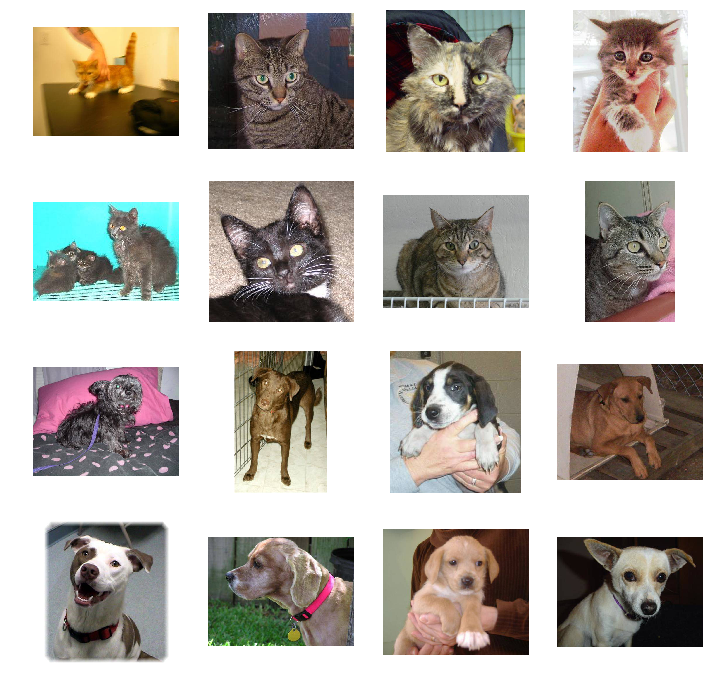

In [4]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

# 모델 구성하기

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()

model.add(layers.InputLayer(input_shape=(150, 150, 3)))
model.add(layers.Conv2D(16, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(32, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(64, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        1

In [6]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['acc'],
)

In [7]:
# 이미지데이터 전처리

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_acc', patience=5)

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_steps=50,
                    verbose=2,
                    callbacks=[es])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 - 15s - loss: 0.7482 - acc: 0.5035 - val_loss: 0.6929 - val_acc: 0.5000
Epoch 2/100
100/100 - 15s - loss: 0.6833 - acc: 0.5495 - val_loss: 0.6456 - val_acc: 0.6150
Epoch 3/100
100/100 - 13s - loss: 0.6285 - acc: 0.6445 - val_loss: 0.6217 - val_acc: 0.6490
Epoch 4/100
100/100 - 14s - loss: 0.5874 - acc: 0.6830 - val_loss: 0.5944 - val_acc: 0.6910
Epoch 5/100
100/100 - 13s - loss: 0.5723 - acc: 0.6970 - val_loss: 0.6539 - val_acc: 0.5860
Epoch 6/100
100/100 - 13s - loss: 0.5593 - acc: 0.7090 - val_loss: 0.5744 - val_acc: 0.6930
Epoch 7/100
100/100 - 12s - loss: 0.4942 - acc: 0.7590 - val_loss: 0.6113 - val_acc: 0.6800
Epoch 8/100
100/100 - 12s - loss: 0.4372 - acc: 0.7965 - val_loss: 0.6071 - val_acc: 0.6910
Epoch 9/100
100/100 - 12s - loss: 0.4123 - acc: 0.8080 - val_loss: 0.6388 - val_acc: 0.6850
Epoch 10/100
100/100 - 12s - loss: 0.3529 - acc: 0.8415 - val_loss: 0.7164 - va

# 학습 결과 시각화

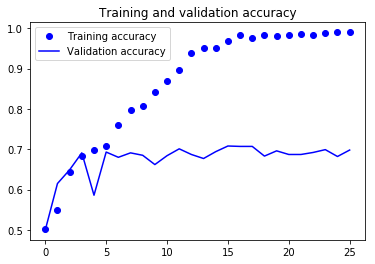

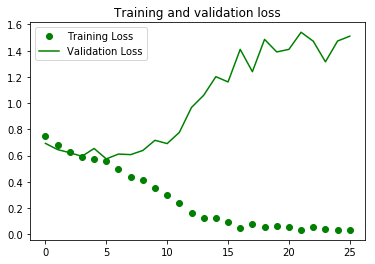

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# TEST

In [11]:
import numpy as np
from tensorflow.keras.preprocessing import image

path = './test_cat.jpg'
img = image.load_img(path, target_size=(150, 150))

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

print(classes[0])

if classes[0]>0:
    print('test_cat.jpg' + " is a dog")
else:
    print('test_cat.jpg' + " is a cat")

[1.]
test_cat.jpg is a dog


In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image

path = './test_dog.png'
img = image.load_img(path, target_size=(150, 150))

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

print(classes[0])

if classes[0]>0:
    print('test_dog.png' + " is a dog")
else:
    print('test_dog.png' + " is a cat")

[1.]
test_dog.png is a dog


In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image

path = './test_현영.jpg'
img = image.load_img(path, target_size=(150, 150))

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

print(classes[0])

if classes[0]>0:
    print('test_현영.jpg' + " is a dog")
else:
    print('test_현영.jpg' + " is a cat")

[1.]
test_현영.jpg is a dog


In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image

path = './test_낙헌.jpg'
img = image.load_img(path, target_size=(150, 150))

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

print(classes[0])

if classes[0]>0:
    print('test_낙헌.jpg' + " is a dog")
else:
    print('test_낙헌.jpg' + " is a cat")

[1.]
test_낙헌.jpg is a dog
